# Project Machine Learning : rockpaperscissors

- Nama: Ali Imron Nasrulloh
- Email: imronnasrulloh009@gmail.com
- Id Dicoding: imron_nasrulloh009

In [1]:
!pip install split-folders
import splitfolders
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import requests
from keras.preprocessing import image
import os

In [2]:
# Download dataset
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [3]:
# Path ke dataset awal
input_folder = 'rockpaperscissors/rps-cv-images'

In [4]:
# Path untuk menyimpan hasil pembagian dataset
output_folder = 'rockpaperscissors_split'

In [6]:
# Melakukan pembagian dataset dengan split-folders
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.6, 0.4))


Copying files: 2188 files [00:00, 4348.31 files/s]


In [8]:
# Membuat objek ImageDataGenerator untuk augmentasi gambar
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
# Membuat generator untuk train set
train_generator = datagen.flow_from_directory(
    os.path.join(output_folder, 'train'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

Found 1312 images belonging to 3 classes.


In [10]:
# Membuat generator untuk validation set
validation_generator = datagen.flow_from_directory(
    os.path.join(output_folder, 'val'),
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

Found 876 images belonging to 3 classes.


In [11]:
# Membangun model sequential
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

In [12]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Pelatihan model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
41/41 [==============================] - 24s 396ms/step - loss: 1.1412 - accuracy: 0.3735 - val_loss: 1.0775 - val_accuracy: 0.3623
Epoch 2/10
41/41 [==============================] - 21s 513ms/step - loss: 1.0513 - accuracy: 0.4413 - val_loss: 0.9287 - val_accuracy: 0.5278
Epoch 3/10
41/41 [==============================] - 18s 445ms/step - loss: 0.7376 - accuracy: 0.6867 - val_loss: 0.5756 - val_accuracy: 0.7650
Epoch 4/10
41/41 [==============================] - 21s 512ms/step - loss: 0.4924 - accuracy: 0.8102 - val_loss: 0.3044 - val_accuracy: 0.8935
Epoch 5/10
41/41 [==============================] - 21s 512ms/step - loss: 0.2914 - accuracy: 0.9040 - val_loss: 0.2396 - val_accuracy: 0.9201
Epoch 6/10
41/41 [==============================] - 21s 510ms/step - loss: 0.2136 - accuracy: 0.9390 - val_loss: 0.1207 - val_accuracy: 0.9653
Epoch 7/10
41/41 [==============================] - 16s 393ms/step - loss: 0.1914 - accuracy: 0.9398 - val_loss: 0.1730 - val_accuracy: 0.9433

In [14]:
# Evaluasi model
accuracy = history.history['accuracy'][-1]
print(f'Akurasi model: {accuracy * 100:.2f}%')

Akurasi model: 96.27%


In [15]:
def predict_uploaded_image(model, uploaded_image_path):
    img = tf.keras.preprocessing.image.load_img(uploaded_image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    img_array /= 255.0

    predictions = model.predict(img_array)

    class_labels = train_generator.class_indices
    labels = list(class_labels.keys())

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    predicted_label = labels[np.argmax(predictions)]
    print(f'Predicted Label: {predicted_label}')
    print(f'Confidence: {np.max(predictions) * 100:.2f}%')

1/1 [==============================] - 0s 409ms/step


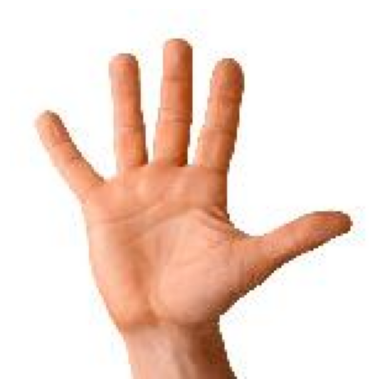

Predicted Label: paper
Confidence: 100.00%


In [16]:
url = 'https://github.com/Imronnugraha/portofolio-data-analyst/raw/main/image.jpg'

response = requests.get(url, stream=True)
response.raise_for_status()

local_image_path = 'image.jpg'
with open(local_image_path, 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

img = image.load_img(local_image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

temp_img_path = 'temp_image.jpg'
image.save_img(temp_img_path, img_array[0])

predict_uploaded_image(model, temp_img_path)